In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from scipy.stats import zscore
from scipy.stats import boxcox

In [2]:
df_baseball=pd.read_csv('baseball.csv')
df_baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [3]:
df_baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [4]:
df_baseball.shape

(30, 17)

In [5]:
df_baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [6]:
df_baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


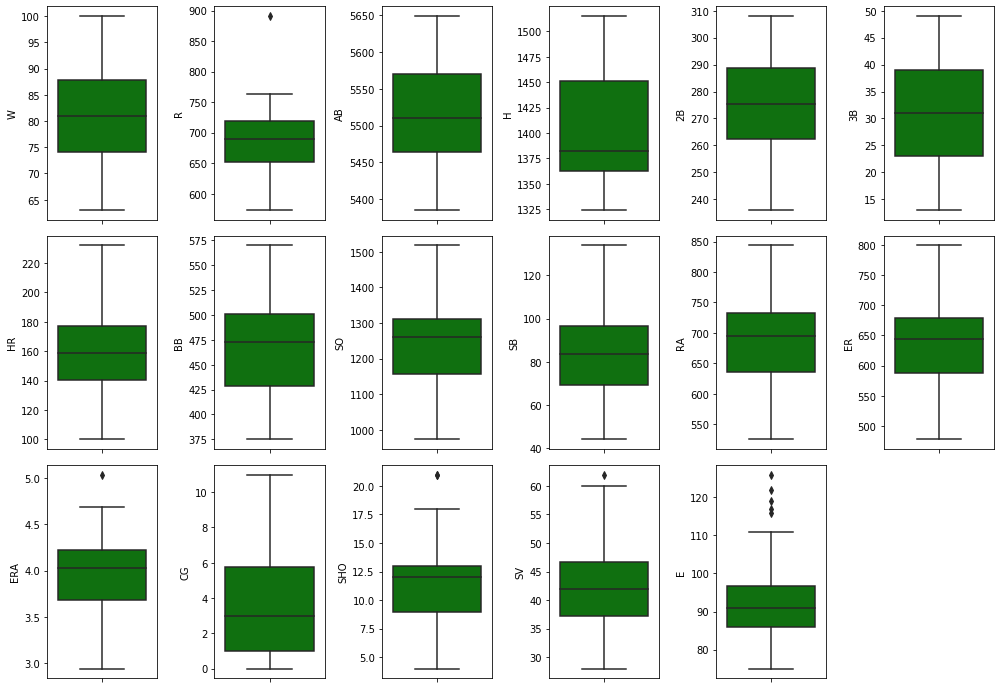

In [7]:
col_list=df_baseball.columns.values
plt.figure(figsize=(14,16))
for i in range(0, len(col_list)):                                       #Boxplot to check outliers
    plt.subplot(5,6,i+1)
    sns.boxplot(df_baseball[col_list[i]], color="green", orient='v')
    plt.tight_layout()
#There are few outliers.

In [8]:
df_baseball[df_baseball.E>110]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119
14,68,694,5600,1405,277,46,146,475,1119,78,729,664,4.14,5,15,28,126
16,98,697,5631,1462,292,27,140,461,1322,98,596,532,3.21,0,13,54,122
17,97,689,5491,1341,272,30,171,567,1518,95,608,546,3.36,6,21,48,111
18,68,655,5480,1378,274,34,145,412,1299,84,737,682,4.28,1,7,40,116
24,63,626,5529,1374,272,37,130,387,1274,88,809,749,4.69,1,7,35,117


In [9]:
df_baseball[df_baseball.R>750]

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
10,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [10]:
df_baseball_corr=df_baseball.corr()
df_baseball_corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


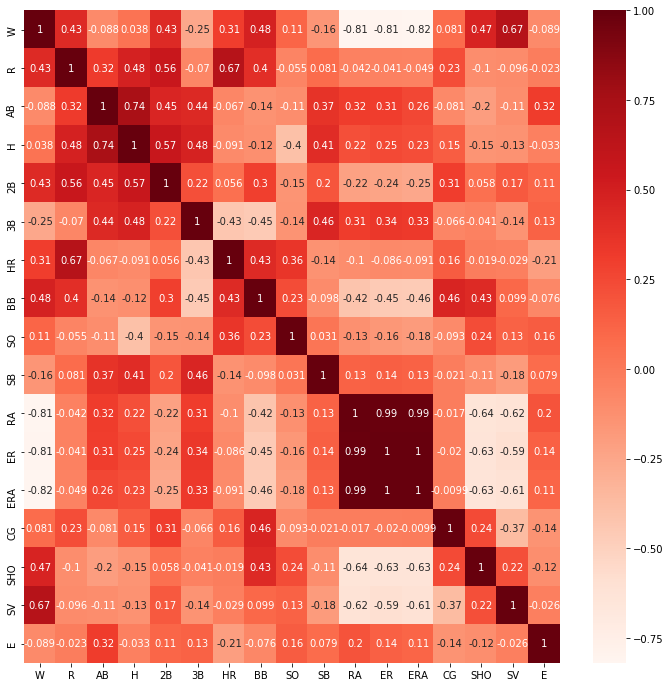

In [11]:
plt.figure(figsize=(12,12))
sns.heatmap(df_baseball_corr,cmap='Reds',annot=True)
#Key Observations:
#There is strong positive relationship between SV(Saves) and W(Wins)
#There are positive but not that strong reltionships between R(Runs), 2B(Double), BB(Walk), SHO(Shutout) with W(Wins)
#There are strong negative relationships between Runs Allowed(RA), Earned Runs(ER), Earned Run Average(ERA) with W(Wins)
#There are weak relationships between AB, H, CG, E with W(Wins)

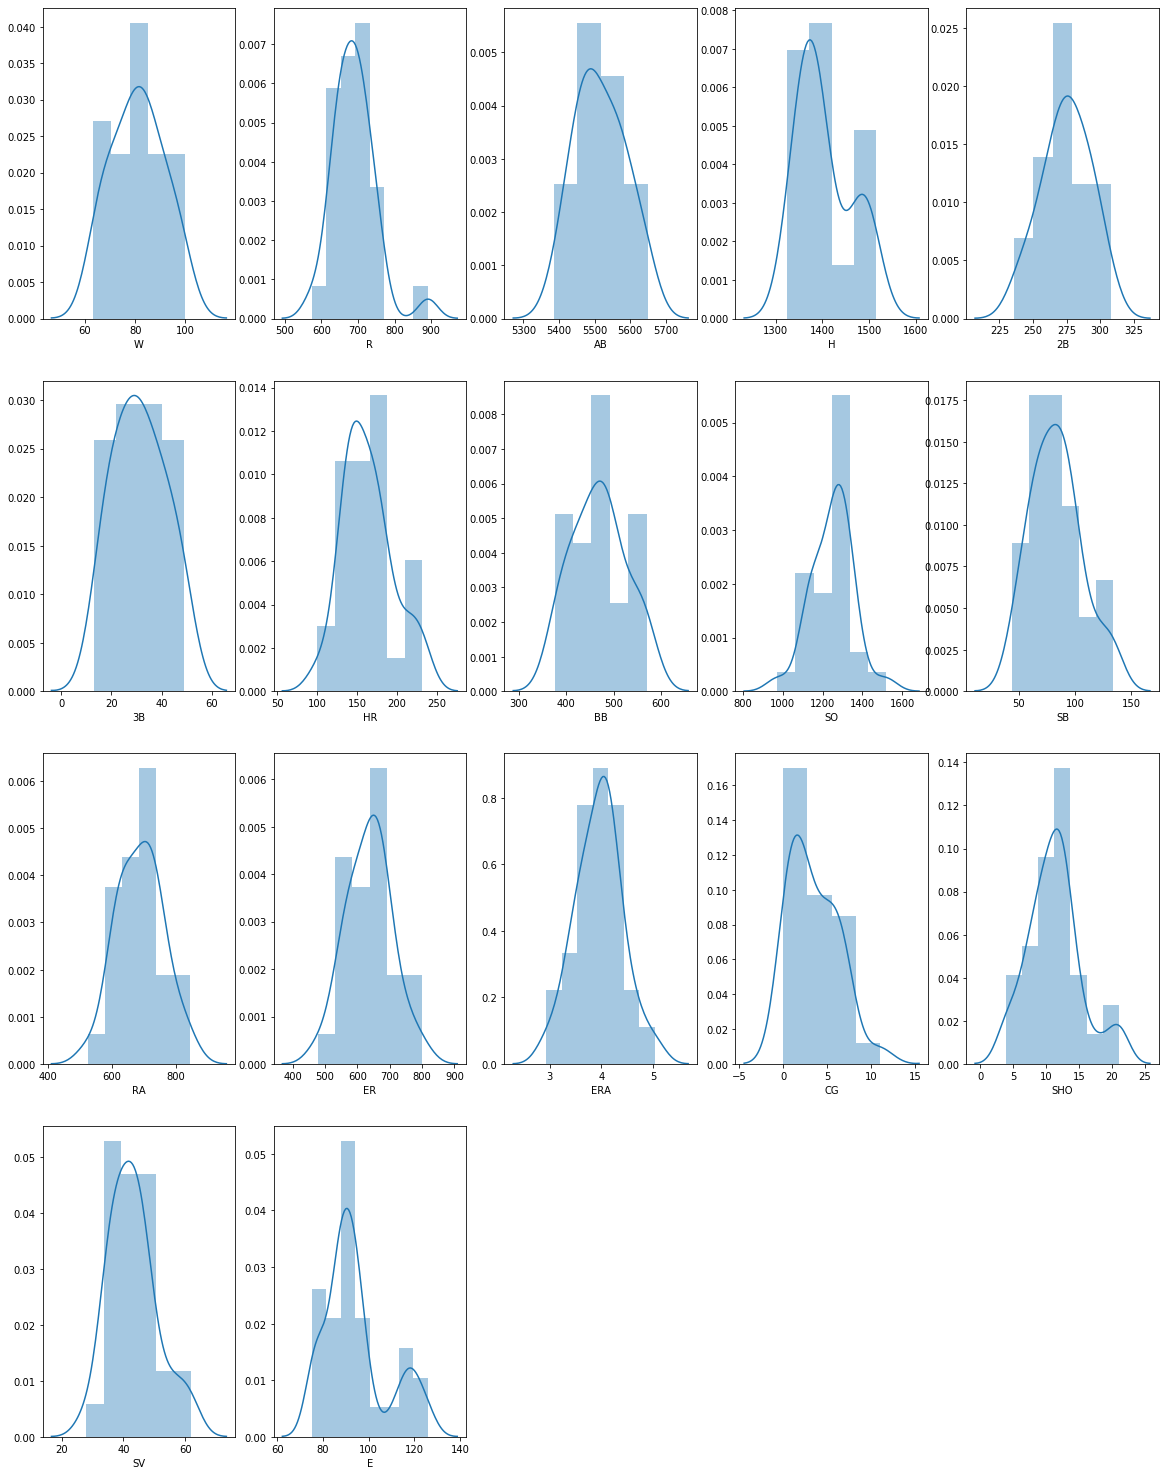

In [12]:
col_list=df_baseball.columns.values
plt.figure(figsize=(20,40))
for i in range(0, len(col_list)):                                       #Distplot is used To check the skewness
    plt.subplot(6,5,i+1)
    sns.distplot(df_baseball[col_list[i]])

In [13]:
#To check and drop duplicates in date
df_base=df_baseball.drop_duplicates()
df_base.shape

(30, 17)

In [14]:
from scipy.stats import zscore
z_score=abs(zscore(df_baseball))
print(df_baseball.shape)
df_baseball_final=df_baseball.loc[(z_score<3).all(axis=1)]                  
print(df_baseball_final.shape)
#to quantify the outliers
#These are few outliers but they are not effecting the data negatively and they will considered part of play

(30, 17)
(29, 17)


In [15]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

In [16]:
#Splitting of data
x=df_baseball.iloc[:,1:]
y=df_baseball['W']

In [20]:
print(x.shape)
print(y.shape)

(30, 16)
(30,)


In [21]:
sc = StandardScaler()
x = sc.fit_transform(x)
#scaling down using standardscalar

In [22]:
#Testing the models at random state 42 along with their r2 score
x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=42,test_size=0.20)
model=[LinearRegression(),DecisionTreeRegressor(),SVR(),KNeighborsRegressor()]

for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(r2_score(y_test,predm))

#After the testing several models, we have found that LinearRegression is giving highest r2 score at random state 42.

0.7876400316149375
0.07916402786573784
0.088386728539261
0.5951868271057634


In [23]:
#Now we will check at what randome state, LinearRegression model will give highest r2 score.
max_r_score=0
for r_state in range(42,101):
    x_train,x_test,y_train,y_test= train_test_split(x,y,random_state=r_state,test_size=0.20)
    regr=linear_model.LinearRegression()
    regr.fit(x_train,y_train)
    y_pred=regr.predict(x_test)
    r2_scr=r2_score(y_test,y_pred)
    print("r2 score corresponding to random state: ",r_state," is: ",r2_scr)
    if r2_scr>max_r_score:
        max_r_score=r2_scr
        final_r_state=r_state
print()
print()
print('max r2 score corresponding to ',final_r_state," is ",max_r_score)
#Max. r2 score with LinearRegression model is  0.8804448045510328, which is at random state 99.

r2 score corresponding to random state:  42  is:  0.7876400316149375
r2 score corresponding to random state:  43  is:  -1.0543428896603464
r2 score corresponding to random state:  44  is:  0.5894992447123875
r2 score corresponding to random state:  45  is:  0.6385651240924848
r2 score corresponding to random state:  46  is:  0.6261439472974568
r2 score corresponding to random state:  47  is:  0.8116559418363329
r2 score corresponding to random state:  48  is:  0.823469407179675
r2 score corresponding to random state:  49  is:  -0.07399772649652925
r2 score corresponding to random state:  50  is:  0.6111709711670295
r2 score corresponding to random state:  51  is:  0.45827451765865723
r2 score corresponding to random state:  52  is:  0.5097793692109425
r2 score corresponding to random state:  53  is:  0.2550058206707274
r2 score corresponding to random state:  54  is:  0.7551746347340764
r2 score corresponding to random state:  55  is:  0.7860903369149637
r2 score corresponding to rando

In [32]:
#Cross Validation of LinearRegression
from sklearn.model_selection import cross_val_score
cross_val_score(LinearRegression(),x,y,cv=4,scoring='r2').mean()

0.24952166654369337

In [33]:
#since maximum r2 score is coming around random state 99 and using LinearRegression model, we will use that to create our model
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=99,test_size=0.20)
lr=LinearRegression()            
lr.fit(x_train,y_train)
lr.score(x_train,y_train)
y_pred=lr.predict(x_test)
print(r2_score(y_test,y_pred))

0.8804448045510328


In [34]:
df_baseball_pred=pd.DataFrame(y_pred)                #To save the prediction in csv
df_baseball_pred.to_csv("Project7_Prediction.csv")